In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_excel(r"C:\Users\vaish\OneDrive\Desktop\Projects\spam_detection\spam_ham_sms_dataset(1).xlsx")

In [4]:
df.head()

,message_id,sender,message,timestamp,is_spam,category
0,1,AD-JIO-125,Congratulations! You've won a lottery. Click h...,2023-01-01 00:00:00,0.0,Promotional
1,2,AD-BANK-350,You have a new voicemail. Check now.,2023-01-01 01:00:00,0.0,Promotional
2,3,AD-WINZO-242,Congratulations! You've won a lottery. Click h...,2023-01-01 02:00:00,0.0,Promotional
3,4,AD-JIO-792,You have a new voicemail. Check now.,2023-01-01 03:00:00,1.0,Promotional
4,5,AD-INFO-189,Don't forget mom's birthday this Friday.,2023-01-01 04:00:00,1.0,Transactional


In [5]:
df.isnull().sum()

message_id    0
sender        0
message       1
timestamp     0
is_spam       1
category      0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   message_id  998 non-null    int64         
 1   sender      998 non-null    object        
 2   message     998 non-null    object        
 3   timestamp   998 non-null    datetime64[ns]
 4   is_spam     998 non-null    float64       
 5   category    998 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 54.6+ KB


In [8]:
df.duplicated().sum()
df = df.drop_duplicates()

In [9]:
df.head()

,message_id,sender,message,timestamp,is_spam,category
0,1,AD-JIO-125,Congratulations! You've won a lottery. Click h...,2023-01-01 00:00:00,0.0,Promotional
1,2,AD-BANK-350,You have a new voicemail. Check now.,2023-01-01 01:00:00,0.0,Promotional
2,3,AD-WINZO-242,Congratulations! You've won a lottery. Click h...,2023-01-01 02:00:00,0.0,Promotional
3,4,AD-JIO-792,You have a new voicemail. Check now.,2023-01-01 03:00:00,1.0,Promotional
4,5,AD-INFO-189,Don't forget mom's birthday this Friday.,2023-01-01 04:00:00,1.0,Transactional


In [10]:
df.shape

(998, 6)

In [11]:
df = df.drop(['message_id'], axis=1)

In [12]:
df = df.drop(['timestamp'], axis=1)

In [13]:
df = df.drop(['sender'], axis=1)

In [14]:
df.head(20)

,message,is_spam,category
0,Congratulations! You've won a lottery. Click h...,0.0,Promotional
1,You have a new voicemail. Check now.,0.0,Promotional
2,Congratulations! You've won a lottery. Click h...,0.0,Promotional
3,You have a new voicemail. Check now.,1.0,Promotional
4,Don't forget mom's birthday this Friday.,1.0,Transactional
5,Meeting scheduled at 3 PM tomorrow.,0.0,Promotional
6,"Hello, let's meet at 5 PM near the cafe.",0.0,Transactional
7,You have a new voicemail. Check now.,0.0,Personal
8,Reminder: Your EMI is due. Pay now to avoid pe...,1.0,Promotional
9,Meeting scheduled at 3 PM tomorrow.,1.0,Transactional


In [15]:
df['is_spam'].value_counts()

is_spam
0.0    511
1.0    487
Name: count, dtype: int64

In [16]:
df['message'] = df['message'].str.replace('!', '')
df['message'] = df['message'].str.replace(',', '')
df['message'] = df['message'].str.replace(':', '')
df['message'] = df['message'].str.replace('%', '')
df['message'] = df['message'].str.replace('.', '')
df['message'] = df['message'].str.replace("'", '')

In [17]:
df.message

0      Congratulations Youve won a lottery Click here...
1                     You have a new voicemail Check now
2      Congratulations Youve won a lottery Click here...
3                     You have a new voicemail Check now
4                  Dont forget moms birthday this Friday
                             ...                        
995    Congratulations Youve won a lottery Click here...
996    Reminder Your EMI is due Pay now to avoid penalty
997           Free recharge on downloading our app Hurry
998                Dont forget moms birthday this Friday
999    Limited time loan offer Get 竄ｹ200000 approved ...
Name: message, Length: 998, dtype: object

In [18]:
df['message'] = df['message'].str.replace('竄ｹ', '')
df['message'] = df['message'].str.lower()

In [19]:
df.head(20)

,message,is_spam,category
0,congratulations youve won a lottery click here...,0.0,Promotional
1,you have a new voicemail check now,0.0,Promotional
2,congratulations youve won a lottery click here...,0.0,Promotional
3,you have a new voicemail check now,1.0,Promotional
4,dont forget moms birthday this friday,1.0,Transactional
5,meeting scheduled at 3 pm tomorrow,0.0,Promotional
6,hello lets meet at 5 pm near the cafe,0.0,Transactional
7,you have a new voicemail check now,0.0,Personal
8,reminder your emi is due pay now to avoid penalty,1.0,Promotional
9,meeting scheduled at 3 pm tomorrow,1.0,Transactional


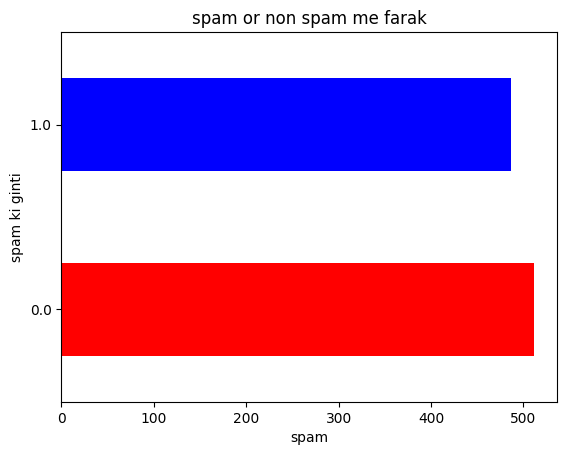

In [20]:
df['is_spam'].value_counts().plot(kind='barh', color=['red', 'blue'])
plt.title('spam or non spam me farak')
plt.xlabel('spam')
plt.ylabel('spam ki ginti')
plt.show()

C:\Users\vaish\AppData\Local\Temp\ipykernel_15456\3045136833.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_spam', palette='pastel')


Text(0.5, 1.0, 'Spam vs Non-Spam Count')

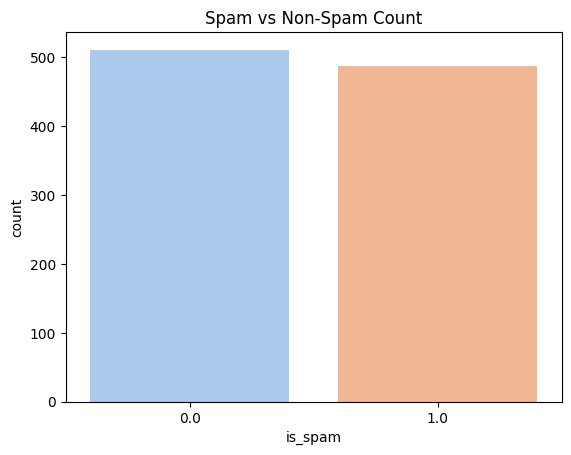

In [21]:
sns.countplot(data=df, x='is_spam', palette='pastel')
plt.title('Spam vs Non-Spam Count')

Text(0.5, 0, 'Count')

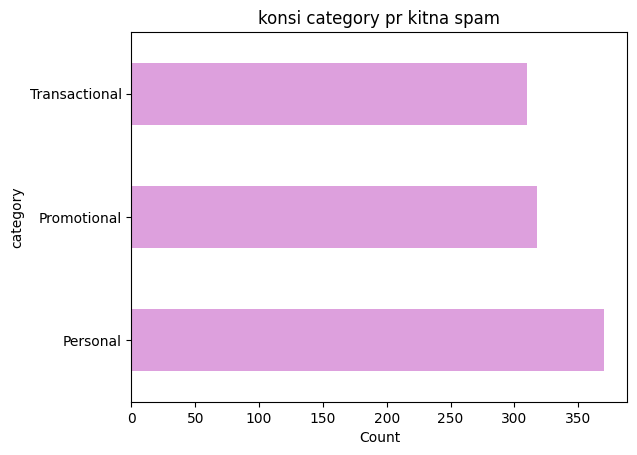

In [22]:
df['category'].value_counts().plot(kind='barh', color='plum')
plt.title('konsi category pr kitna spam')
plt.xlabel('Count')

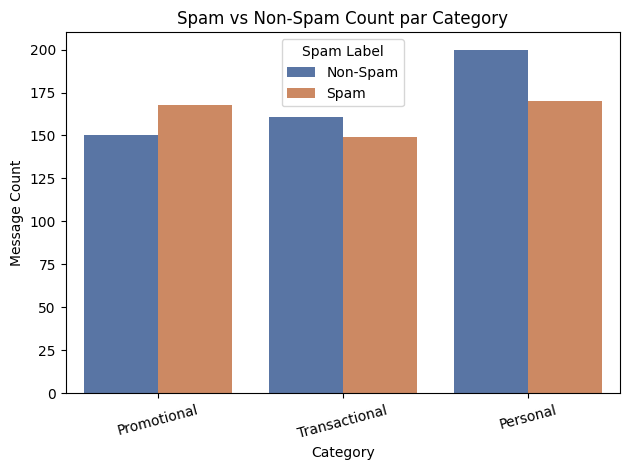

In [23]:
sns.countplot(data=df, x='category', hue='is_spam', palette='deep')
plt.title('Spam vs Non-Spam Count par Category')
plt.xlabel('Category')
plt.ylabel('Message Count')
plt.xticks(rotation=15)
plt.legend(title='Spam Label', labels=['Non-Spam', 'Spam'])
plt.tight_layout()
plt.show()

In [24]:
# Yaha se mai funky chize try kr raha tha simple zada kuch ni bss explore kr raha tha

df['message'].apply(len)

0      59
1      34
2      59
3      34
4      37
       ..
995    59
996    49
997    42
998    37
999    49
Name: message, Length: 998, dtype: int64

Text(0, 0.5, 'Message Length')

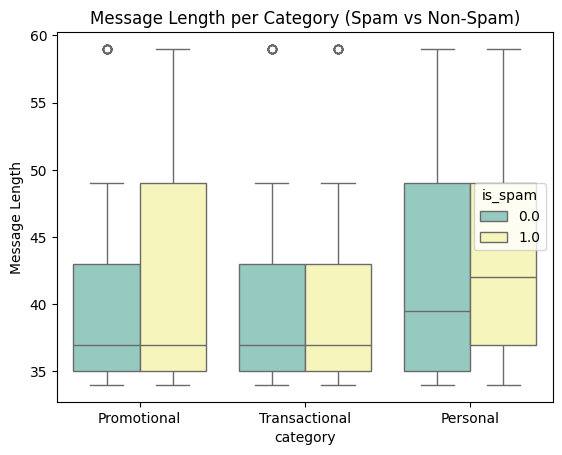

In [25]:
sns.boxplot(data=df, x='category', y=df['message'].apply(len), hue='is_spam', palette='Set3')
plt.title('Message Length per Category (Spam vs Non-Spam)')
plt.ylabel('Message Length')

Text(0.5, 1.0, 'Violin Plot')

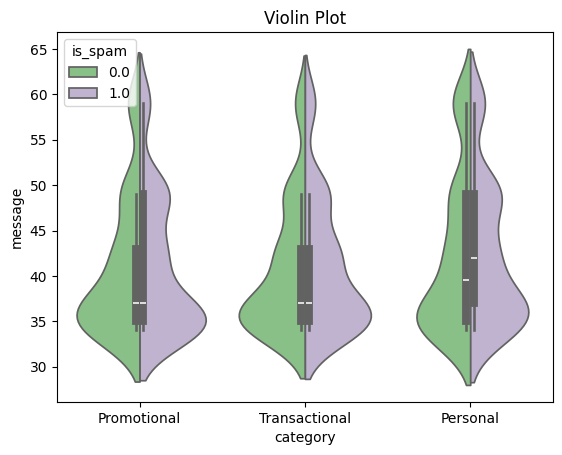

In [26]:
sns.violinplot(data=df, x='category', y=df['message'].apply(len), hue='is_spam', split=True, palette='Accent')
plt.title('Violin Plot')

C:\Users\vaish\AppData\Roaming\Python\Python313\site-packages\seaborn\categorical.py:3399: UserWarning: 45.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vaish\AppData\Roaming\Python\Python313\site-packages\seaborn\categorical.py:3399: UserWarning: 44.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vaish\AppData\Roaming\Python\Python313\site-packages\seaborn\categorical.py:3399: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Swarmplot of Message Lengths')

C:\Users\vaish\AppData\Roaming\Python\Python313\site-packages\seaborn\categorical.py:3399: UserWarning: 58.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vaish\AppData\Roaming\Python\Python313\site-packages\seaborn\categorical.py:3399: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vaish\AppData\Roaming\Python\Python313\site-packages\seaborn\categorical.py:3399: UserWarning: 64.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


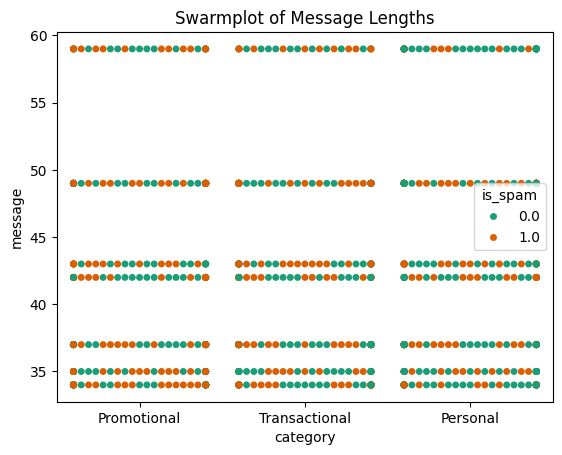

In [27]:
sns.swarmplot(data=df, x='category', y=df['message'].apply(len), hue='is_spam', palette='Dark2')
plt.title('Swarmplot of Message Lengths')

In [28]:
df['message_length'] = df['message'].apply(len)

In [29]:
df.head()

,message,is_spam,category,message_length
0,congratulations youve won a lottery click here...,0.0,Promotional,59
1,you have a new voicemail check now,0.0,Promotional,34
2,congratulations youve won a lottery click here...,0.0,Promotional,59
3,you have a new voicemail check now,1.0,Promotional,34
4,dont forget moms birthday this friday,1.0,Transactional,37


<Axes: xlabel='is_spam', ylabel='message_length'>

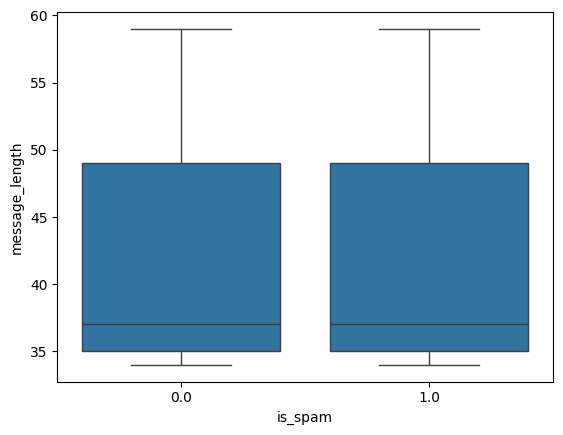

In [30]:
sns.boxplot(data=df , x = 'is_spam', y = 'message_length')

In [31]:
import nltk 
# nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def rem_stopwords(text):

    tokens = word_tokenize(text.lower())
    non_stop_words = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(non_stop_words)

df['clean_message'] = df['message'].apply(rem_stopwords)

In [32]:
df.head(10)

,message,is_spam,category,message_length,clean_message
0,congratulations youve won a lottery click here...,0.0,Promotional,59,congratulations youve lottery click claim
1,you have a new voicemail check now,0.0,Promotional,34,new voicemail check
2,congratulations youve won a lottery click here...,0.0,Promotional,59,congratulations youve lottery click claim
3,you have a new voicemail check now,1.0,Promotional,34,new voicemail check
4,dont forget moms birthday this friday,1.0,Transactional,37,dont forget moms birthday friday
5,meeting scheduled at 3 pm tomorrow,0.0,Promotional,34,meeting scheduled pm tomorrow
6,hello lets meet at 5 pm near the cafe,0.0,Transactional,37,hello lets meet pm near cafe
7,you have a new voicemail check now,0.0,Personal,34,new voicemail check
8,reminder your emi is due pay now to avoid penalty,1.0,Promotional,49,reminder emi due pay avoid penalty
9,meeting scheduled at 3 pm tomorrow,1.0,Transactional,34,meeting scheduled pm tomorrow


In [34]:
import re 
df['message'] = df['message'].apply(lambda x: re.sub(r'\d+', '',x))

In [35]:
df.head()

,message,is_spam,category,message_length,clean_message
0,congratulations youve won a lottery click here...,0.0,Promotional,59,congratulations youve lottery click claim
1,you have a new voicemail check now,0.0,Promotional,34,new voicemail check
2,congratulations youve won a lottery click here...,0.0,Promotional,59,congratulations youve lottery click claim
3,you have a new voicemail check now,1.0,Promotional,34,new voicemail check
4,dont forget moms birthday this friday,1.0,Transactional,37,dont forget moms birthday friday


<Axes: title={'center': '10 most occuring words'}, xlabel='Samples', ylabel='Counts'>

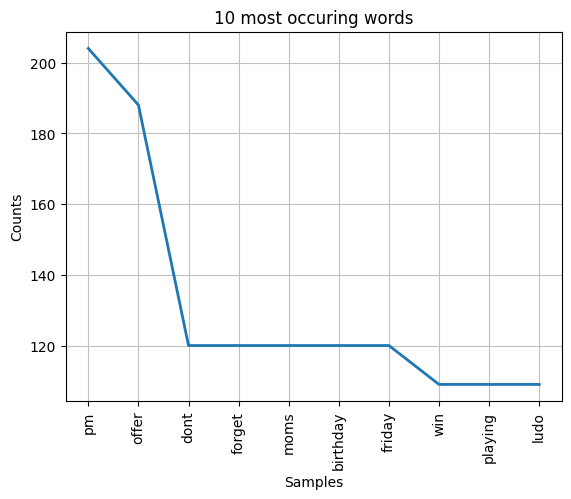

In [ ]:
from nltk import FreqDist

total_words = ' '.join(df['clean_message']).split()

frequent_words = FreqDist(total_words)

frequent_words.plot(10, title='10 most occuring words')